In [1]:
import pandas as pd
import numpy as np

#visulization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

In [2]:
airline_data = pd.read_excel('Data_Train.xlsx')

In [3]:
airline_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [4]:
airline_data.shape

(10683, 11)

In [5]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- Route and stops have one Null value. However we need to check the unique values
- Date of journey to be converted to datatime
- Dep time will be datetime
- Arrival time will be datetime.
- Duration to be converted to min.

In [6]:
airline_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#checking duplicate values
airline_data.duplicated().sum()

220

In [8]:
airline_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Checking the unique values

In [9]:
for col in airline_data.columns:
    print(f"{col} ==> {airline_data[col].nunique()}")
    print("=="*30)
    print(airline_data[col].unique())
    print("=="*30)

Airline ==> 12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ==> 44
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source ==> 5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ==> 6
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route ==> 128
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → 

In [10]:
df = airline_data.copy()

In [11]:
def dep_hour(x):
    if ((x.hour >= 8) and (x.hour < 12)):
        return 'Morning'
    elif ((x.hour >= 12) and (x.hour < 16)):
        return 'Noon'
    elif ((x.hour >= 16) and (x.hour < 20)):
        return 'Evening'
    elif ((x.hour >= 20) and (x.hour < 24)):
        return 'Night'
    else:
        return 'Early Morning'


def preprocess(data):
    
    """
    Return: 2 dataframe data for EDA and data1 for modeling
    """
    #dropping duplicate rows
    data.drop_duplicates(inplace= True)
    
    #drop nan
    data.dropna(inplace = True)

    #converting date of journey to datetimeindex and creating day, day_name and month_name
    data['Date_of_Journey'] = pd.DatetimeIndex(data['Date_of_Journey'])
    data['Month'] = data['Date_of_Journey'].dt.month_name()
    data['Day_name'] = data['Date_of_Journey'].dt.day_name()
    data['Day'] = data['Date_of_Journey'].dt.day
    data.drop('Date_of_Journey', axis = 1, inplace = True)
    
    #Arrival Time
    data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x: x[:5])
    data['Arr_hr'] = pd.to_datetime(data['Arrival_Time']).dt.hour
    data['Arr_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute
    
    #converting dep_time to hr:min format
    data['Dep_hr'] = pd.to_datetime(data['Dep_Time']).dt.hour
    data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute
    
    #converting duration in hrs
    data['Duration'] = data['Duration'].str.replace('h', "*1").str.replace(' ', '+').str.replace('m', '/60').apply(eval)
    
    #there are 'NULL' and "NULL ". Strip the data and replace NULL with NaN
    data['Additional_Info'] = data['Additional_Info'].apply(lambda x: x.strip())
    
    #78% data is NaN. We will drop the column
    data.drop('Additional_Info', axis = 1, inplace = True)
    
    #Destination converting 'New Delhi' to 'Delhi'
    data['Destination'] = np.where(data['Destination'] == 'New Delhi', 'Delhi', data['Destination'])
    
    #Dep and Arrival hour
    data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], format= '%H:%M').dt.time
    data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format= '%H:%M').dt.time
    data['Dep_Hour_Name'] = data['Dep_Time'].apply(lambda x: dep_hour(x))
    data['Arr_Hour_Name'] = data['Arrival_Time'].apply(lambda x: dep_hour(x))
    
    #dropping Arrival_time and Dep_time
    data.drop(['Dep_Time', 'Arrival_Time'], axis = 1, inplace =True)
    
    #Airline column 
    data['Airline'] = np.where(data['Airline'] == 'Multiple carriers Premium economy', 'Multiple carriers', data['Airline'])
    data['Airline'] = np.where(data['Airline'] == 'Jet Airways Business', 'Jet Airways', data['Airline'])
    data['Airline'] = np.where(data['Airline'] == 'Vistara Premium economy', 'Vistara', data['Airline'])
    
    #dropping Route
    data.drop('Route', axis = 1, inplace = True)
    
    #Total stops
    data['Total_Stops'] = data['Total_Stops'].map({'non-stop' : 0, '1 stop' : 1,
                                                  '2 stops' : 2, '3 stops' : 3, '4 stops' : 4})
    
    
    data1 = data.copy()
    
    data1 = pd.get_dummies(data=data, columns=['Airline', 'Source', 'Destination'], 
               prefix=['Airline', 'Source', 'Destination'], drop_first= True)
    
    encode = LabelEncoder()
    data1['Month'] = encode.fit_transform(data1['Month'])
    data1['Day_name'] = encode.fit_transform(data1['Day_name'])
    data1['Dep_Hour_Name'] = encode.fit_transform(data1['Dep_Hour_Name'])
    data1['Arr_Hour_Name'] = encode.fit_transform(data1['Arr_Hour_Name'])
    
    return data, data1

In [12]:
data, data_model = preprocess(df) 

In [13]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day_name,Day,Arr_hr,Arr_min,Dep_hr,Dep_min,Dep_Hour_Name,Arr_Hour_Name
0,IndiGo,Banglore,Delhi,2.833333,0,3897,March,Sunday,24,1,10,22,20,Night,Early Morning
1,Air India,Kolkata,Banglore,7.416667,2,7662,January,Saturday,5,13,15,5,50,Early Morning,Noon
2,Jet Airways,Delhi,Cochin,19.000000,2,13882,September,Friday,6,4,25,9,25,Morning,Early Morning
3,IndiGo,Kolkata,Banglore,5.416667,1,6218,December,Thursday,5,23,30,18,5,Evening,Night
4,IndiGo,Banglore,Delhi,4.750000,1,13302,January,Thursday,3,21,35,16,50,Evening,Night


In [14]:
data_model.head()

,Duration,Total_Stops,Price,Month,Day_name,Day,Arr_hr,Arr_min,Dep_hr,Dep_min,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2.833333,0,3897,4,3,24,1,10,22,20,...,0,0,0,0,0,0,0,1,0,0
1,7.416667,2,7662,2,2,5,13,15,5,50,...,0,0,0,0,1,0,0,0,0,0
2,19.000000,2,13882,6,0,6,4,25,9,25,...,0,0,0,1,0,0,1,0,0,0
3,5.416667,1,6218,1,4,5,23,30,18,5,...,0,0,0,0,1,0,0,0,0,0
4,4.750000,1,13302,2,4,3,21,35,16,50,...,0,0,0,0,0,0,0,1,0,0


## EDA

In [15]:
#checking day_name and month avg price change
pivot_day_month_price = data.pivot_table(index= 'Day_name', columns= 'Month', values= 'Price', aggfunc= np.mean)
#let us check the flight count basis day_name and month
pivot_day_month_count = data.pivot_table(index= 'Day_name', columns= 'Month', values= 'Price', aggfunc= np.size)

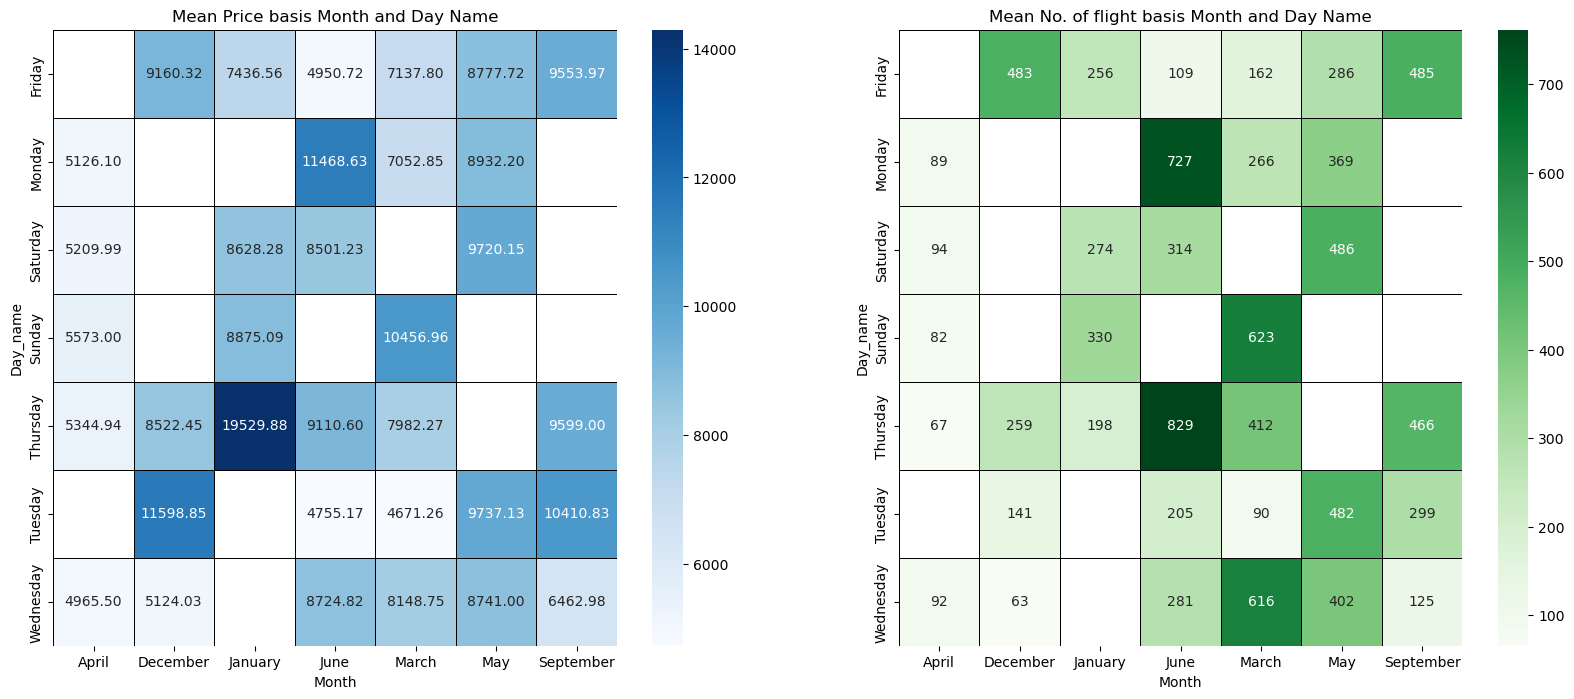

In [16]:
#ploting heatmp
plt.figure(figsize=(20,8))
for i in range(2):
    plt.subplot(1,2,1)
    sns.heatmap(pivot_day_month_price, annot= True, fmt = '.2f', cmap = 'Blues',linecolor='black',linewidths= .5,robust= True)
    plt.title("Mean Price basis Month and Day Name")
    plt.subplot(1,2,2)
    sns.heatmap(pivot_day_month_count, annot= True, fmt = '.0f', cmap = 'Greens',linecolor='black',linewidths= .5,robust= True)
    plt.title("Mean No. of flight basis Month and Day Name")    
plt.show()

### Observation
- In the month of March Avg prices are high. 
- Maximum price observed on Friday.
- In the month of April all the prices and flights were low than other months. 
- In the month of June Prices are 2nd highest

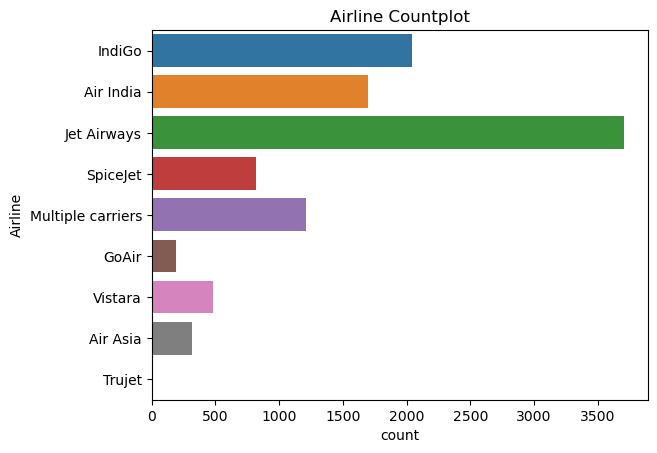

In [17]:
#ploting Airline
sns.countplot(y = 'Airline', data= data)
plt.title("Airline Countplot")
plt.show()

- Most of the flights are from Jet Airways.

In [18]:
data['Airline'].value_counts(normalize= True)

Jet Airways          0.354234
IndiGo               0.195278
Air India            0.161919
Multiple carriers    0.115561
SpiceJet             0.077901
Vistara              0.045976
Air Asia             0.030491
GoAir                0.018543
Trujet               0.000096
Name: Airline, dtype: float64

- Basis above graph and above value counts removing low frequency Airline

In [19]:
data.drop(data[data['Airline'] == 'Trujet'].index, inplace= True)
data_model.drop('Airline_Trujet', axis = 1, inplace = True)

In [20]:
data['Airline'].value_counts()

Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

### Price column analysis

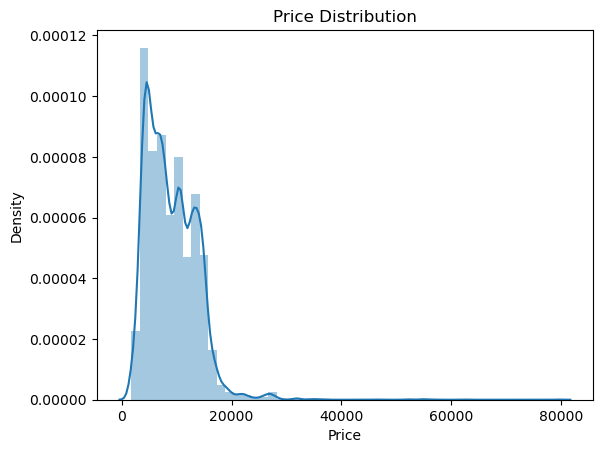

In [21]:
# checking the price distribution
sns.distplot(data['Price'], bins = 50)
plt.title("Price Distribution")
plt.show()

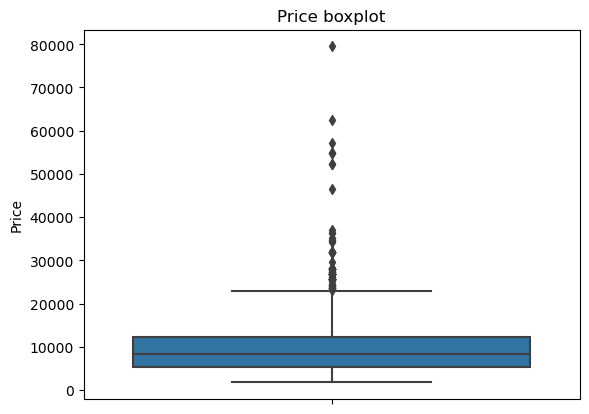

In [22]:
#price total distribution
sns.boxplot(y = data['Price'])
plt.title("Price boxplot")
plt.show()

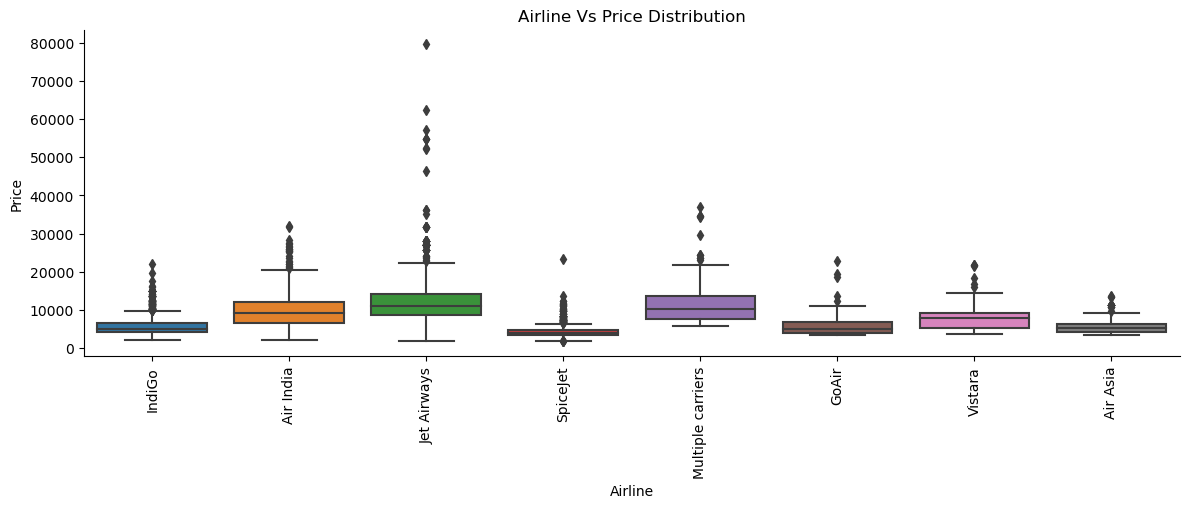

In [23]:
#boxplot on the price plot basis airline

sns.catplot(data = data, x = 'Airline', y = 'Price', kind= 'box', height= 4, aspect= 3 )
plt.xticks(rotation = 90)
plt.title("Airline Vs Price Distribution")
plt.show()

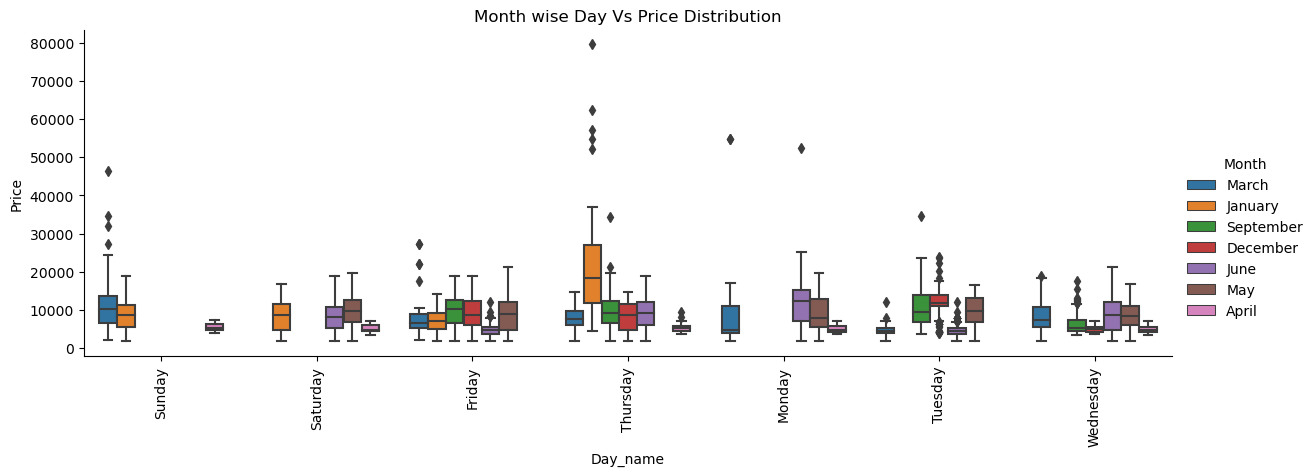

In [24]:
#boxplot on the price plot basis day name

sns.catplot(data = data, x = 'Day_name', y = 'Price', hue = 'Month', kind= 'box', height= 4, aspect= 3)
plt.xticks(rotation = 90)
plt.title("Month wise Day Vs Price Distribution")
plt.show()

### Observation
- It looks like there is outliers in the price column
- All airlines having outliers.
- Prices are falctuating on month of march and on Friday.

### Source column analysis

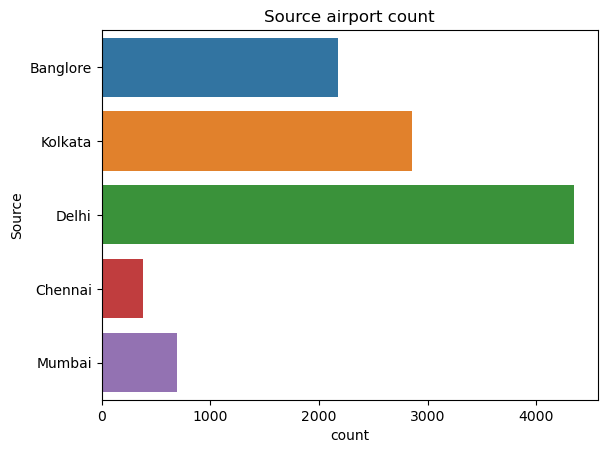

In [25]:
sns.countplot(y = data['Source'])
plt.title("Source airport count")
plt.show()

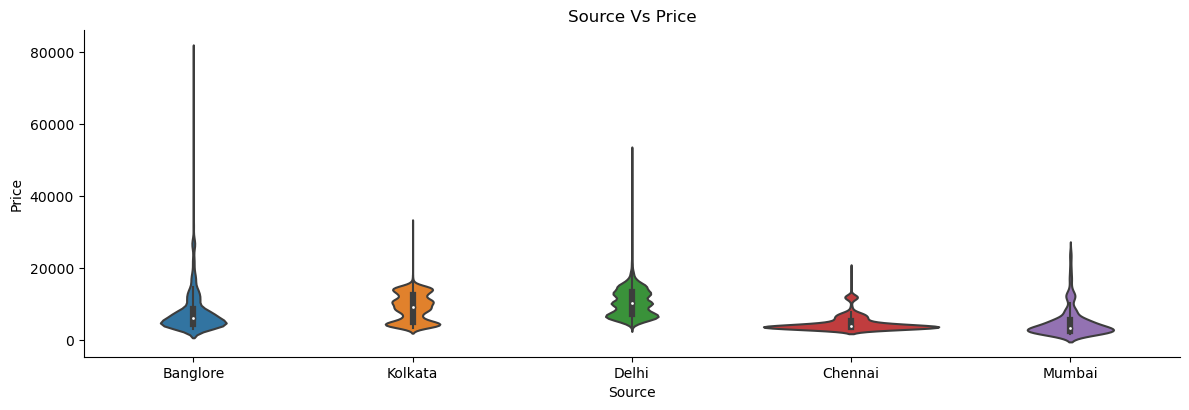

In [26]:
#source Vs Price
sns.catplot(data = data, x = 'Source', y = 'Price', kind = 'violin', height= 4, aspect= 3)
plt.title("Source Vs Price")
plt.show()

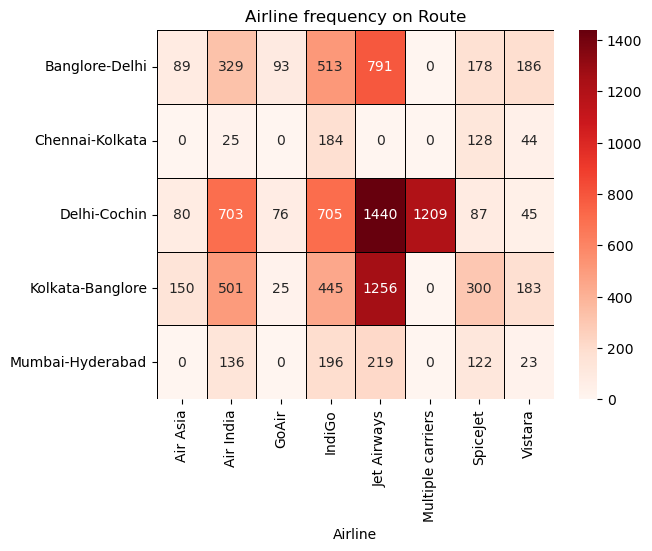

In [27]:
#Source-Destination airline frequency check
route = data['Source'] + '-' + data['Destination']
route_airline = data.pivot_table(index= route, columns= 'Airline', aggfunc= 'size', fill_value= 0)
sns.heatmap(route_airline, annot= True, fmt = '.0f', cmap = 'Reds', linewidths= .5, linecolor= 'black')
plt.title('Airline frequency on Route')
plt.show()

### Observation
- Most of the flight Source station is Delhi.
- Bangalore flight having maximum price varience.
- Chennai flight got lowest number of flight.
- Most of the flight runs between Delhi and Cochin.
- Jet airways are mostly operating between Kolkata Bangalore and Delhi Cochin route.

### Total Stops column analysis

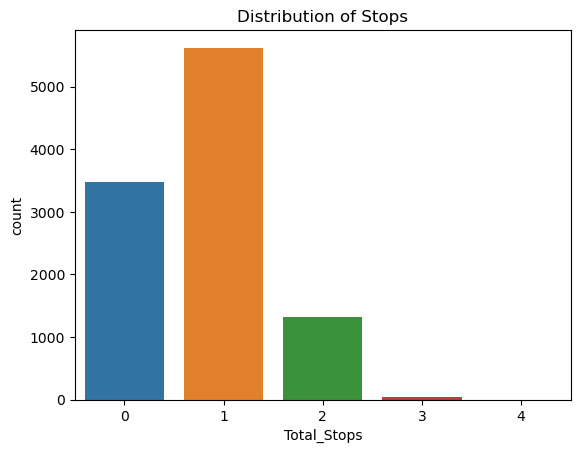

In [28]:
sns.countplot(x= data['Total_Stops'])
plt.title("Distribution of Stops")
plt.show()

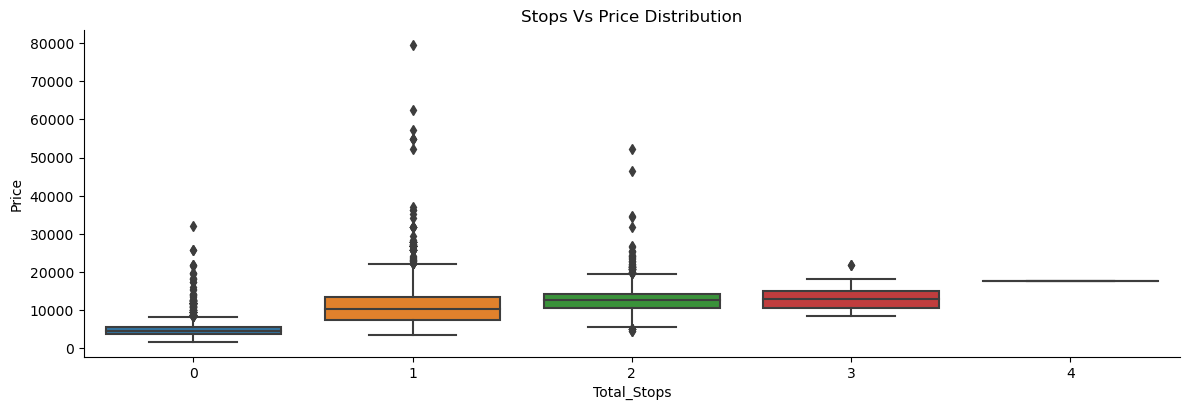

In [29]:
#checking Stops Vs Price
sns.catplot(data=data, x= 'Total_Stops', y = 'Price', kind= 'box', height= 4, aspect= 3)
plt.title("Stops Vs Price Distribution")
plt.show()

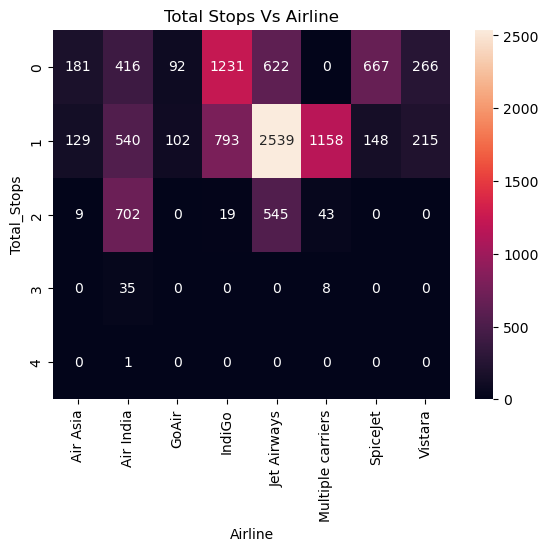

In [30]:
#checking Stops Vs Airline
sns.heatmap(data.pivot_table(index= 'Total_Stops', columns= 'Airline', aggfunc= 'size', fill_value= 0), annot= True,
            fmt = '.0f')
plt.title("Total Stops Vs Airline")
plt.show()

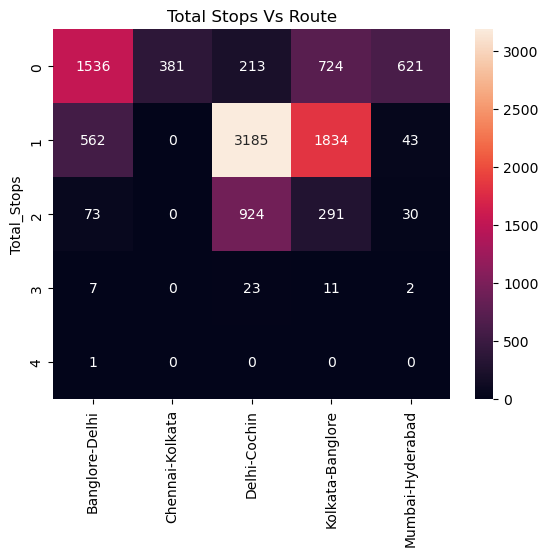

In [31]:
#checking Stops Vs =Route
sns.heatmap(data.pivot_table(index= 'Total_Stops', columns= route, aggfunc= 'size', fill_value= 0), annot= True,
            fmt = '.0f')
plt.title("Total Stops Vs Route")
plt.show()

### Observation
- 4 stops having minimum number of observations.
- Most common option is 1 stop and Non stop.
- Bangalore Delhi having most non stop flight.
- Kolkata Bangalore and Delihi Coachin mostly having 1 stop flights
- 1 Stop and nonstop flight having most price varience.

### Checking Duration column

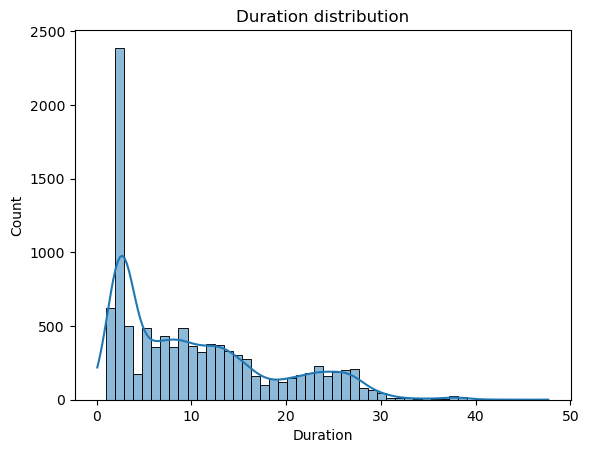

In [34]:
sns.histplot(data['Duration'], kde= True, bins = 50)
plt.title("Duration distribution")
plt.show()

<Axes: ylabel='Duration'>

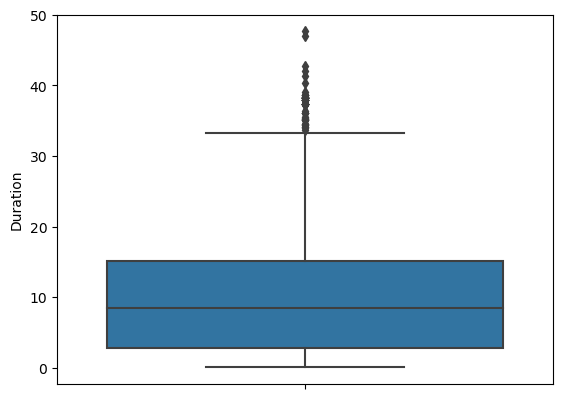

In [35]:
#checking boxplot on duration
sns.boxplot(y = data['Duration'])

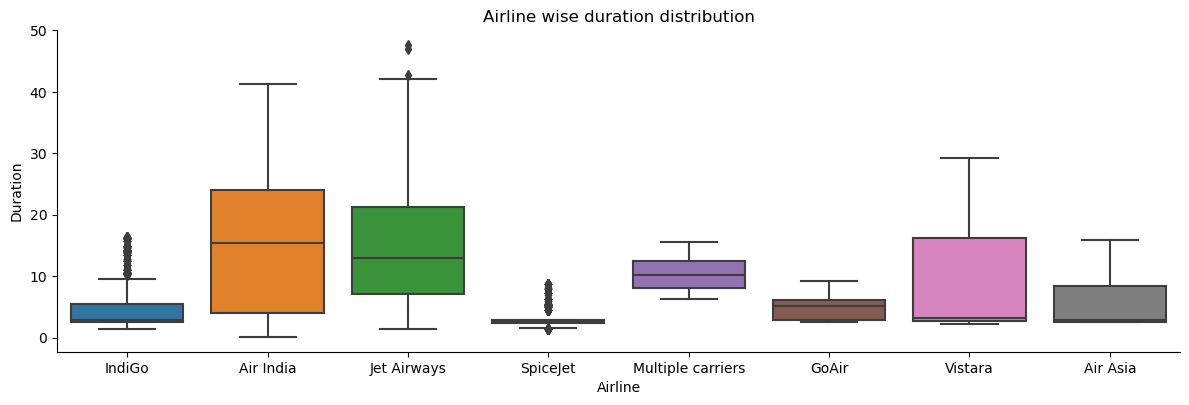

In [36]:
#checking the boxplot basis airline
sns.catplot(data = data, x = 'Airline', y = 'Duration', kind= 'box', height= 4, aspect= 3)
plt.title("Airline wise duration distribution")
plt.show()

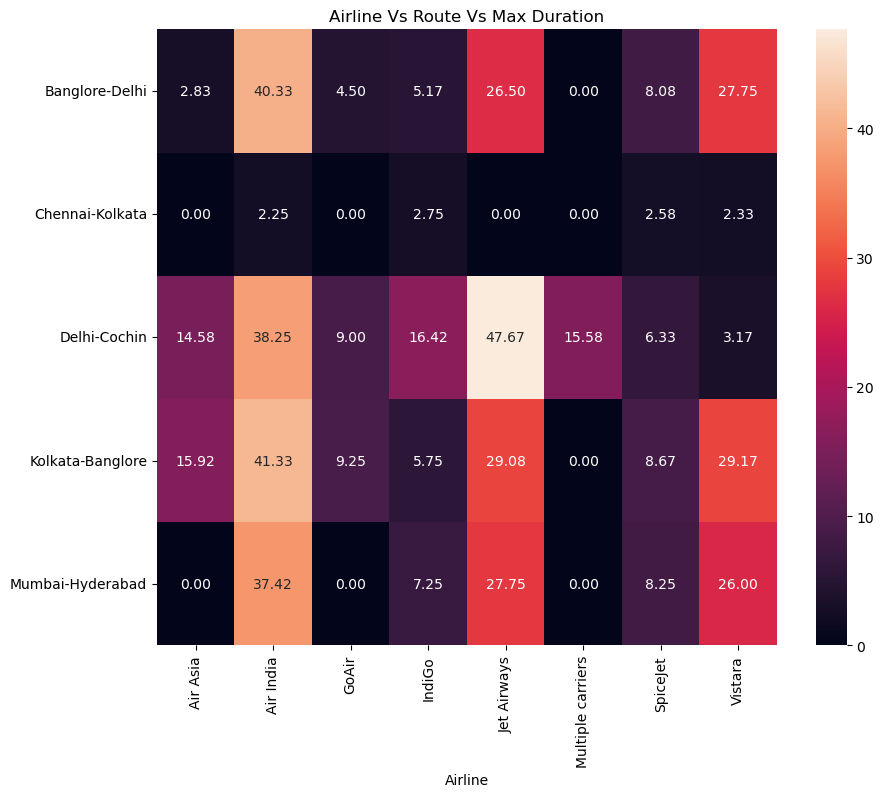

In [37]:
#checking Duration Vs Route
route = data['Source'] + '-' + data['Destination']
plt.figure(figsize=(10,8))
sns.heatmap(data.pivot_table(index= route, columns= 'Airline', values = 'Duration', aggfunc= 'max', fill_value= 0),
           annot= True, fmt = '.2f')
plt.title("Airline Vs Route Vs Max Duration")
plt.show()

### Observation
- Outliers are noted.
- we need to trat the outliers
- Indigo and Spicejet having much outliers.
- Vistara and AirAsia having most the of the observation on the Q3.
- Vistara running 1 stop flights 215 basis above graphs and they are taking highest waiting time. To compensate this Price of Vistara is low.

## Duration column Outlier detection

In [38]:
def outliers(df):
    Q1 = df.quantile(.25)
    Q3 = df.quantile(.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 -1.5*IQR
    
    return upper, lower

In [39]:
df = data[['Duration']]
upper, lower = outliers(df)

In [40]:
upper

Duration    33.666667
dtype: float64

In [41]:
data['Duration'] = np.where(data['Duration'] > upper[0], upper[0], np.where(data['Duration'] < lower[0], lower[0], data['Duration']))
data_model['Duration'] = np.where(data_model['Duration'] > upper[0], upper[0], np.where(data_model['Duration'] < lower[0], lower[0], data_model['Duration']))

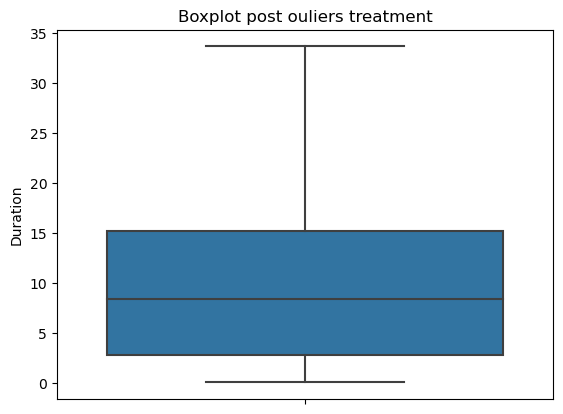

In [42]:
sns.boxplot(y = data['Duration'])
plt.title("Boxplot post ouliers treatment")
plt.show()

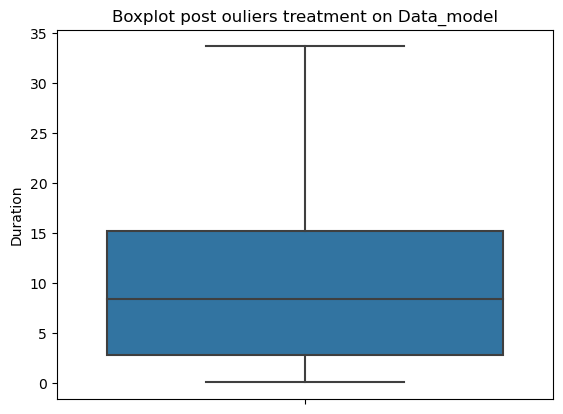

In [43]:
sns.boxplot(y = data_model['Duration'])
plt.title("Boxplot post ouliers treatment on Data_model")
plt.show()

### Observation
- No outliers noted

## Data Preperation

In [45]:
X = data_model.drop('Price', axis = 1)
Y = data_model['Price']

In [46]:
X.head()

,Duration,Total_Stops,Month,Day_name,Day,Arr_hr,Arr_min,Dep_hr,Dep_min,Dep_Hour_Name,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2.833333,0,4,3,24,1,10,22,20,3,...,0,0,0,0,0,0,0,1,0,0
1,7.416667,2,2,2,5,13,15,5,50,0,...,0,0,0,0,1,0,0,0,0,0
2,19.000000,2,6,0,6,4,25,9,25,2,...,0,0,0,1,0,0,1,0,0,0
3,5.416667,1,1,4,5,23,30,18,5,1,...,0,0,0,0,1,0,0,0,0,0
4,4.750000,1,2,4,3,21,35,16,50,1,...,0,0,0,0,0,0,0,1,0,0


## Checking Correlation 

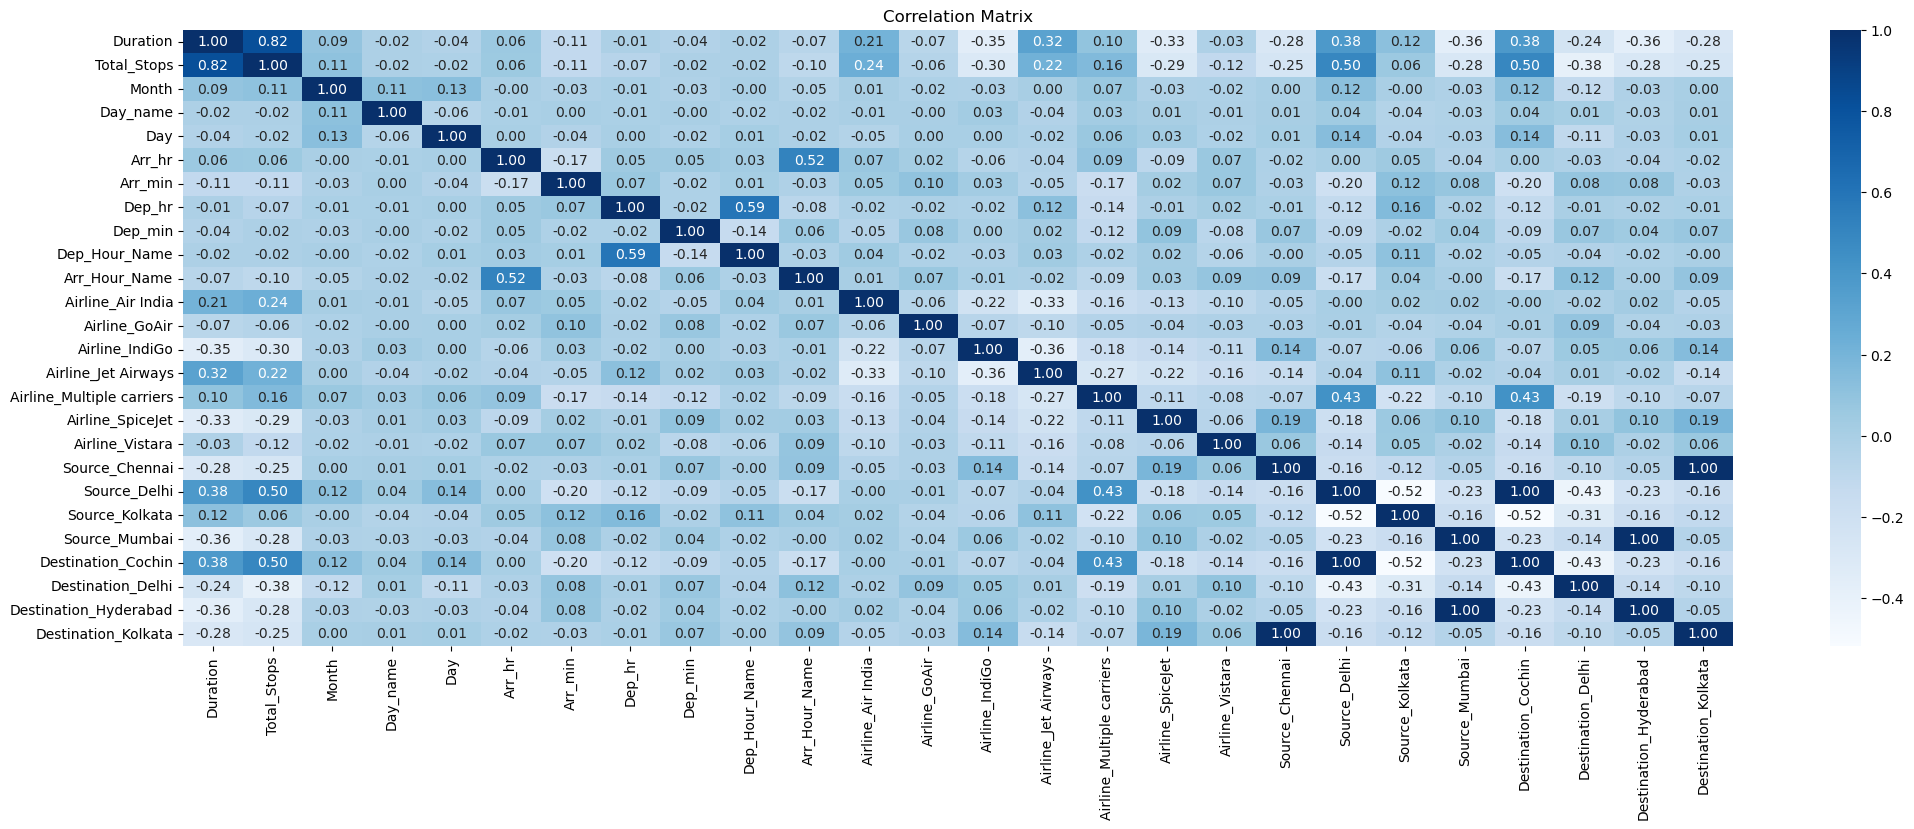

In [50]:
plt.figure(figsize=(25,8))
cor_mat = X.corr(method= 'spearman')
sns.heatmap(cor_mat, annot= True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation Matrix')
plt.show()

In [51]:
cor_mat[cor_mat>.7]

,Duration,Total_Stops,Month,Day_name,Day,Arr_hr,Arr_min,Dep_hr,Dep_min,Dep_Hour_Name,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
Duration,1.000000,0.821364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,0.821364,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_name,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arr_hr,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arr_min,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Hour_Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observation
- Duration and Total stops having multi colenearity.
- Drop Total stops

In [52]:
X.drop('Total_Stops', axis = 1, inplace = True)

In [53]:
X.head(2)

,Duration,Month,Day_name,Day,Arr_hr,Arr_min,Dep_hr,Dep_min,Dep_Hour_Name,Arr_Hour_Name,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2.833333,4,3,24,1,10,22,20,3,0,...,0,0,0,0,0,0,0,1,0,0
1,7.416667,2,2,5,13,15,5,50,0,4,...,0,0,0,0,1,0,0,0,0,0


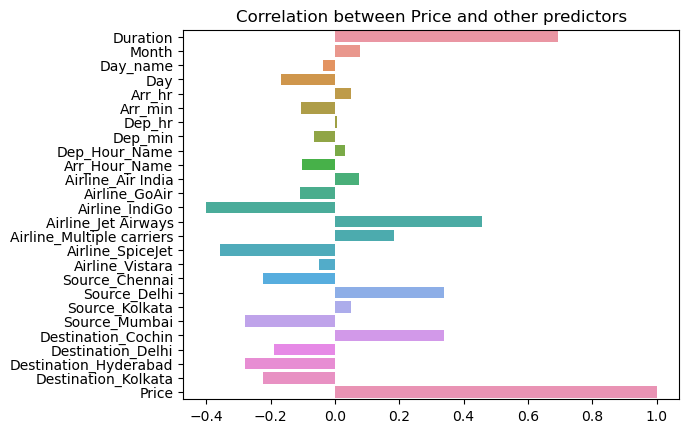

Duration                     0.693974
Month                        0.079252
Day_name                    -0.035643
Day                         -0.166908
Arr_hr                       0.049502
Arr_min                     -0.105109
Dep_hr                       0.006096
Dep_min                     -0.063518
Dep_Hour_Name                0.032357
Arr_Hour_Name               -0.101665
Airline_Air India            0.076383
Airline_GoAir               -0.108677
Airline_IndiGo              -0.401200
Airline_Jet Airways          0.457231
Airline_Multiple carriers    0.184743
Airline_SpiceJet            -0.357970
Airline_Vistara             -0.048765
Source_Chennai              -0.222044
Source_Delhi                 0.337970
Source_Kolkata               0.048688
Source_Mumbai               -0.278338
Destination_Cochin           0.337970
Destination_Delhi           -0.190210
Destination_Hyderabad       -0.278338
Destination_Kolkata         -0.222044
Price                        1.000000
dtype: float

In [54]:
#checking correlation  between target and predictor
temp_df = pd.concat([X,Y], axis = 1)
corrwith_price = temp_df.corrwith(temp_df['Price'], method= 'spearman')
sns.barplot(x = corrwith_price.values,
           y = corrwith_price.index)
plt.title("Correlation between Price and other predictors")
plt.show()
print(corrwith_price)

### Observation
- Duration getting much linearity on .69

## Train test split and scaling the data

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size= .8, random_state= 42)

In [56]:
# scalling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [57]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)

X_train Shape: (8369, 25)
X_test Shape: (2093, 25)


## Model building

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, \
GradientBoostingRegressor, VotingRegressor, ExtraTreesRegressor

#matric
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [59]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
sgd = SGDRegressor()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
gd = GradientBoostingRegressor()


models = [lr, ridge, lasso, sgd, knn, dt, rf, et, gd]

In [60]:
def model_predict(X1, X2, y1,y2, models):
    scores = []
    train_model = []
    for model in models:
        model.fit(X1,y1)
        y_pred = model.predict(X2)
        score = cross_val_score(model, X1, y1, cv = 5,scoring='r2')
        scores.append(round(score.mean(),2))
        train_model.append(model)
    sns.barplot(x=scores, y=[type(model).__name__ for model in train_model])
    plt.title('Training cross Validate r2')
    plt.show()
    for model, score in zip(train_model, scores):
        print(f"{type(model).__name__}: {score}")
    return train_model

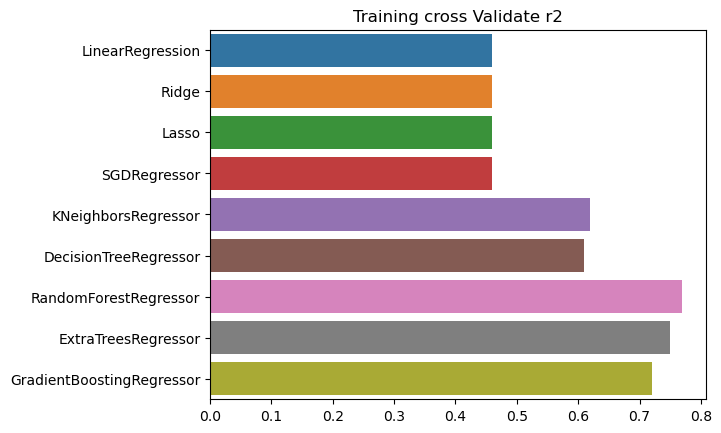

LinearRegression: 0.46
Ridge: 0.46
Lasso: 0.46
SGDRegressor: 0.46
KNeighborsRegressor: 0.62
DecisionTreeRegressor: 0.61
RandomForestRegressor: 0.77
ExtraTreesRegressor: 0.75
GradientBoostingRegressor: 0.72


In [61]:
trained_model = model_predict(X_train, X_test, y_train, y_test, models)

In [62]:
def metrics(models,X2, y2):
    print("=="*30)
    for model in models:
        y_pred = model.predict(X2)
        print(type(model).__name__)
        print("=="*30)
        print("Test r2: ",round(r2_score(y2, y_pred),2))
        adj_r2 = round(1-(1-r2_score(y2,y_pred)*(X2.shape[0] - 1)/(X2.shape[0] - X2.shape[1])),2)
        print("Test adj r2: ", adj_r2)
        print("Mean absolute:", round(mean_absolute_error(y2, y_pred),2))
        print("Mean squared:", round(mean_squared_error(y2, y_pred),2))
        print("root mean error", round(np.sqrt(mean_squared_error(y2,y_pred)),2))
        print("=="*30)
    

In [63]:
metrics(trained_model, X_test, y_test)

LinearRegression
Test r2:  0.47
Test adj r2:  0.47
Mean absolute: 2280.45
Mean squared: 11138429.07
root mean error 3337.43
Ridge
Test r2:  0.47
Test adj r2:  0.47
Mean absolute: 2280.35
Mean squared: 11138109.37
root mean error 3337.38
Lasso
Test r2:  0.47
Test adj r2:  0.47
Mean absolute: 2279.63
Mean squared: 11136321.44
root mean error 3337.11
SGDRegressor
Test r2:  0.46
Test adj r2:  0.47
Mean absolute: 2294.98
Mean squared: 11240155.0
root mean error 3352.63
KNeighborsRegressor
Test r2:  0.63
Test adj r2:  0.64
Mean absolute: 1750.69
Mean squared: 7747388.87
root mean error 2783.41
DecisionTreeRegressor
Test r2:  0.71
Test adj r2:  0.72
Mean absolute: 1394.7
Mean squared: 5954066.35
root mean error 2440.1
RandomForestRegressor
Test r2:  0.8
Test adj r2:  0.81
Mean absolute: 1243.97
Mean squared: 4208992.07
root mean error 2051.58
ExtraTreesRegressor
Test r2:  0.75
Test adj r2:  0.76
Mean absolute: 1336.17
Mean squared: 5256963.97
root mean error 2292.81
GradientBoostingRegressor


## Observation
- Random Forest giving best result.
- Hyper tunning is required
- Models are not overfitted.
- SVR is underfitted.

## Ada Boost with KNN

In [64]:
knn1 = KNeighborsRegressor(n_neighbors= 10)
ada = AdaBoostRegressor(estimator= knn1, random_state= 42)
ada.fit(X_train, y_train)

AdaBoostRegressor(estimator=KNeighborsRegressor(n_neighbors=10),
                  random_state=42)

In [65]:
r2_score(y_train,ada.predict(X_train))

0.7979592225215768

In [66]:
metrics([ada],X_test, y_test)

AdaBoostRegressor
Test r2:  0.53
Test adj r2:  0.54
Mean absolute: 2089.75
Mean squared: 9759297.2
root mean error 3123.99


## Hypertunning RandomForest

In [67]:
#using ramdosearch CV to hypertune the model
from sklearn.model_selection import RandomizedSearchCV
rf1 = RandomForestRegressor(random_state= 42)

In [82]:
param_grid = {
    
    'max_depth' : range(5,12),
    'n_estimators' : range(300,500,20),
    'min_weight_fraction_leaf' : np.logspace(0,-20,50),
    'min_impurity_decrease' : np.logspace(0,-20,50),
    'max_features' : range(2,17),
#     'oob_score' : [True, False]
}

grid = RandomizedSearchCV(rf1,param_distributions=param_grid, cv= 5, n_iter=50, n_jobs= -1, scoring= 'r2')

In [83]:
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(5, 12),
                                        'max_features': range(2, 17),
                                        'min_impurity_decrease': array([1.00000000e+00, 3.90693994e-01, 1.52641797e-01, 5.96362332e-02,
       2.32995181e-02, 9.10298178e-03, 3.55648031e-03, 1.38949549e-03,
       5.42867544e-04, 2.12095089e-04, 8.28...
       3.72759372e-12, 1.45634848e-12, 5.68986603e-13, 2.22299648e-13,
       8.68511374e-14, 3.39322177e-14, 1.32571137e-14, 5.17947468e-15,
       2.02358965e-15, 7.90604321e-16, 3.08884360e-16, 1.20679264e-16,
       4.71486636e-17, 1.84206997e-17, 7.19685673e-18, 2.81176870e-18,
       1.09854114e-18, 4.29193426e-19, 1.67683294e-19, 6.55128557e-20,
       2.55954792e-20, 1.00000000e-20]),
                                        'n_estimators': range(300, 500, 20)},
                   scoring='r2')

In [84]:
grid.best_estimator_

RandomForestRegressor(max_depth=11, max_features=13,
                      min_impurity_decrease=1.6768329368110032e-19,
                      min_weight_fraction_leaf=4.291934260128761e-19,
                      n_estimators=420, random_state=42)

In [86]:
grid.score(X_train, y_train)

0.8886244390039824

In [87]:
grid.score(X_test, y_test)

0.8085679543858022

In [88]:
metrics([grid], X_test, y_test)

RandomizedSearchCV
Test r2:  0.81
Test adj r2:  0.82
Mean absolute: 1317.34
Mean squared: 3991411.06
root mean error 1997.85


In [89]:
grid.best_score_

0.7885280476717175

In [105]:
#basis hyper parameter tunning random forest is giving best rest with following parametes
# max_depth=11, max_features=13,
#                       min_impurity_decrease=1.6768329368110032e-19,
#                       min_weight_fraction_leaf=4.291934260128761e-19,
#                       n_estimators=420, random_state=42

In [102]:
rf2 = RandomForestRegressor(max_depth=11, max_features=13,
                      min_impurity_decrease=1.6768329368110032e-19,
                      min_weight_fraction_leaf=4.291934260128761e-19,
                      n_estimators=420, random_state=42)
rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features=13,
                      min_impurity_decrease=1.6768329368110032e-19,
                      min_weight_fraction_leaf=4.291934260128761e-19,
                      n_estimators=420, random_state=42)

In [103]:
print("Traing Score: ", rf2.score(X_train, y_train))

Traing Score:  0.8886244390039824


In [104]:
print("Testing Score: ", rf2.score(X_test, y_test))

Testing Score:  0.8085679543858022


In [105]:
metrics([rf2], X_test, y_test)

RandomForestRegressor
Test r2:  0.81
Test adj r2:  0.82
Mean absolute: 1317.34
Mean squared: 3991411.06
root mean error 1997.85


In [106]:
#KNN hyperparameter tuning
knn2 = KNeighborsRegressor()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [107]:
param_grid_knn = {
   'n_neighbors' : range(2,20),
    'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}
grid_knn = RandomizedSearchCV(estimator= knn2, param_distributions= param_grid_knn, cv = 10, n_jobs= -1)

In [108]:
grid_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': range(2, 20)})

In [109]:
grid_knn.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=6)

In [110]:
grid_knn.best_score_

0.6365869451172841

In [111]:
grid_knn.score(X_test,y_test)

0.6325584419573959

In [112]:
metrics([grid_knn], X_test, y_test)

RandomizedSearchCV
Test r2:  0.63
Test adj r2:  0.64
Mean absolute: 1758.62
Mean squared: 7661258.04
root mean error 2767.9


In [113]:
#gradient boosting hyperparamter tunnin
gb1 = GradientBoostingRegressor(random_state= 42)
gb1.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [118]:
param_grib_gb = {
    
    'max_depth' : range(5,12),
    'max_features' : range(1,16),
    'learning_rate' : [.001, .0001, .01],
    'n_estimators' : range(200,400,20),
    'ccp_alpha' : np.logspace(0,-10,50)
    
}
grid_gb = RandomizedSearchCV(estimator= gb1, param_distributions= param_grib_gb, cv = 10,)

In [119]:
grid_gb.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'ccp_alpha': array([1.00000000e+00, 6.25055193e-01, 3.90693994e-01, 2.44205309e-01,
       1.52641797e-01, 9.54095476e-02, 5.96362332e-02, 3.72759372e-02,
       2.32995181e-02, 1.45634848e-02, 9.10298178e-03, 5.68986603e-03,
       3.55648031e-03, 2.22299648e-03, 1.38949549e-03, 8.68511...
       2.94705170e-07, 1.84206997e-07, 1.15139540e-07, 7.19685673e-08,
       4.49843267e-08, 2.81176870e-08, 1.75751062e-08, 1.09854114e-08,
       6.86648845e-09, 4.29193426e-09, 2.68269580e-09, 1.67683294e-09,
       1.04811313e-09, 6.55128557e-10, 4.09491506e-10, 2.55954792e-10,
       1.59985872e-10, 1.00000000e-10]),
                                        'learning_rate': [0.001, 0.0001, 0.01],
                                        'max_depth': range(5, 12),
                                        'max_features': range(1, 16),
                                        'n_estimators': range(200, 400, 20)})

In [120]:
grid_gb.best_estimator_

GradientBoostingRegressor(ccp_alpha=6.866488450042998e-09, learning_rate=0.01,
                          max_depth=8, max_features=10, n_estimators=360,
                          random_state=42)

In [121]:
grid_gb.score(X_train,y_train)

0.9096414445335782

In [122]:
grid_gb.score(X_test, y_test)

0.8269412524943344

In [123]:
metrics([grid_gb], X_test, y_test)

RandomizedSearchCV
Test r2:  0.83
Test adj r2:  0.83
Mean absolute: 1174.17
Mean squared: 3577015.68
root mean error 1891.3


In [114]:
#Using votting for KNN, RandomForest, GradientBoosting with hypertune model
rf = RandomForestRegressor(max_depth=11, max_features=13,
                      min_impurity_decrease=1.6768329368110032e-19,
                      min_weight_fraction_leaf=4.291934260128761e-19,
                      n_estimators=420, random_state=42)
knn = KNeighborsRegressor(algorithm='kd_tree', n_neighbors=6)
gb = GradientBoostingRegressor(ccp_alpha=1.67683293681101e-09, learning_rate=0.01,max_depth=7, max_features=12, n_estimators=260,
                               random_state=42)

vote = VotingRegressor(estimators= [('rf', rf), ('knn', knn), ('gb', gb)])
vote.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=11,
                                                   max_features=13,
                                                   min_impurity_decrease=1.6768329368110032e-19,
                                                   min_weight_fraction_leaf=4.291934260128761e-19,
                                                   n_estimators=420,
                                                   random_state=42)),
                            ('knn',
                             KNeighborsRegressor(algorithm='kd_tree',
                                                 n_neighbors=6)),
                            ('gb',
                             GradientBoostingRegressor(ccp_alpha=1.67683293681101e-09,
                                                       learning_rate=0.01,
                                                       max_depth=7,
                                                       max_features=12,
                                                       n_estimators=260,
                                                       random_state=42))])

In [115]:
vote.score(X_train, y_train)

0.8547457816204425

In [116]:
vote.score(X_test, y_test)

0.7787705333368465

In [117]:
metrics([vote], X_test, y_test)

VotingRegressor
Test r2:  0.78
Test adj r2:  0.79
Mean absolute: 1434.64
Mean squared: 4612695.52
root mean error 2147.72


## Using XGBoost

In [118]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 300, max_depth = 4, random_state = 42,max_leaves = 15,
                  grow_policy = 'depthwise')

In [119]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy='depthwise', importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=15,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [120]:
r2_score(y_train,xgb.predict(X_train))

0.9069547216543233

In [122]:
metrics([xgb], X_test, y_test)

XGBRegressor
Test r2:  0.81
Test adj r2:  0.82
Mean absolute: 1259.7
Mean squared: 3908177.42
root mean error 1976.91


## Observation
- There is not much difference in XGB and RandomForest